In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv("your_dataset.csv")

# Convert 'Expiration Date' to datetime
data['Expiration Date'] = pd.to_datetime(data['Expiration Date'])

# Train model for a specific product
def train_model_for_product(product_name):
    # Filter data for the specified product
    product_data = data[data['Food Type'] == product_name]

    # Check if there are enough samples for training
    if len(product_data) < 2:
        print("Insufficient data for training the model for", product_name)
        return None

    # Extract features and target variable
    X = product_data[['Demand', 'Season']]
    y = product_data['Price']

    # Convert 'Demand' and 'Season' to categorical variables
    X['Demand'] = pd.Categorical(X['Demand'], categories=['Low', 'Medium', 'High'], ordered=True)
    X['Season'] = pd.Categorical(X['Season'], categories=['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)

    # One-hot encode categorical features
    X = pd.get_dummies(X)

    # Train Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Return the trained model
    return model

# Function to predict price based on user input
def predict_price(trained_model, demand, season):
    # Create DataFrame with user input
    input_data = pd.DataFrame({'Demand': [demand], 'Season': [season]})

    # Convert 'Demand' and 'Season' to categorical variables
    input_data['Demand'] = pd.Categorical(input_data['Demand'], categories=['Low', 'Medium', 'High'], ordered=True)
    input_data['Season'] = pd.Categorical(input_data['Season'], categories=['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)

    # One-hot encode categorical features
    input_data = pd.get_dummies(input_data)

    # Predict price
    predicted_price = trained_model.predict(input_data)[0]

    # Adjust predicted price based on demand and season
    demand_multipliers = {'Low': 0.90, 'Medium': 0.95, 'High': 1.00}
    season_multipliers = {'Spring': 0.85, 'Summer': 0.90, 'Autumn': 0.95, 'Winter': 1.00}

    demand_multiplier = demand_multipliers.get(demand, 1.0)
    season_multiplier = season_multipliers.get(season, 1.0)

    adjusted_price = psudo pip install --upgrade pipredicted_price * demand_multiplier * season_multiplier

    return adjusted_price

# Example usage
product_name = input("Enter the product name :")
trained_model_for_product = train_model_for_product(product_name)

if trained_model_for_product:
    demand = input("Enter demand (Low, Medium, High): ")
    season = input("Enter season (Spring, Summer, Autumn, Winter): ")

    predicted_price = predict_price(trained_model_for_product, demand, season)
    print("Predicted price for", product_name + ":", predicted_price)


Enter the product name :Chips


<ipython-input-2-c434bb401204>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Demand'] = pd.Categorical(X['Demand'], categories=['Low', 'Medium', 'High'], ordered=True)
<ipython-input-2-c434bb401204>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Season'] = pd.Categorical(X['Season'], categories=['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)


Enter demand (Low, Medium, High): High
Enter season (Spring, Summer, Autumn, Winter): Autumn
Predicted price for Chips: 2.375


<ipython-input-35-f0eb391433d3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Demand'] = pd.Categorical(X['Demand'], categories=['Low', 'Medium', 'High'], ordered=True)
<ipython-input-35-f0eb391433d3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Season'] = pd.Categorical(X['Season'], categories=['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)
<ipython-input-35-f0eb391433d3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

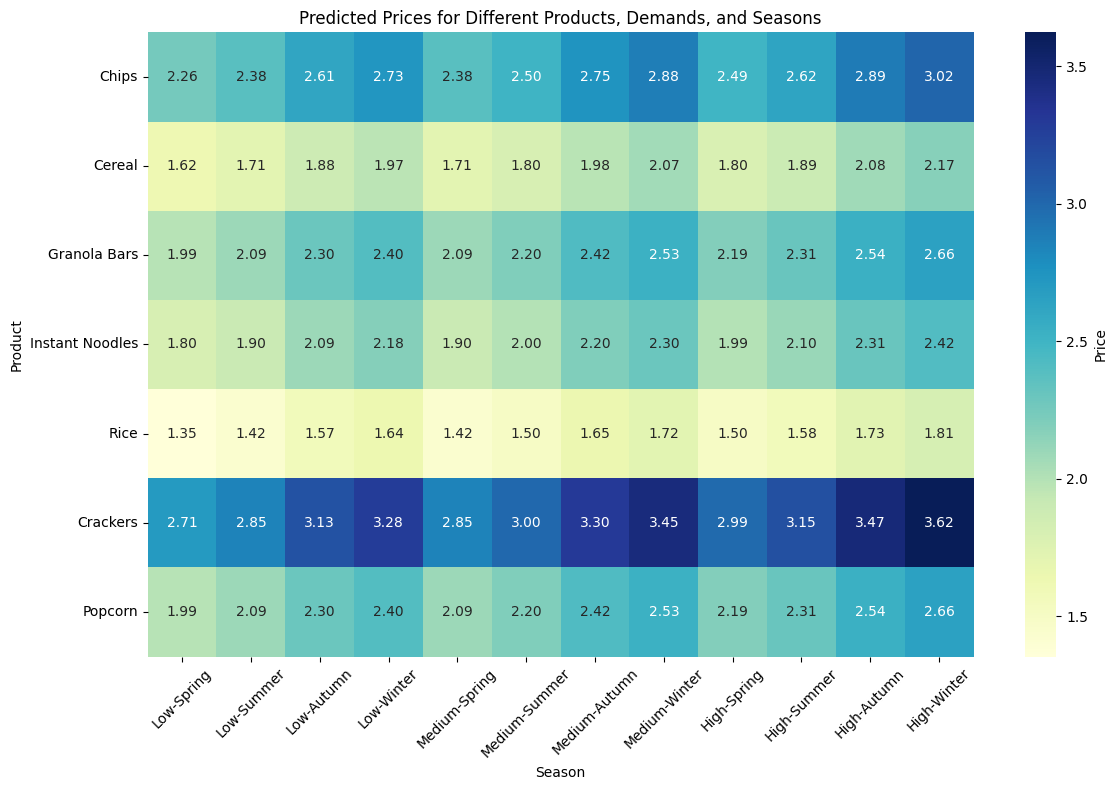

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to create heatmap
def create_heatmap(products, demands, seasons, trained_model):
    # Initialize empty DataFrame to store predicted prices
    prices_df = pd.DataFrame(index=products, columns=pd.MultiIndex.from_product([demands, seasons]))

    # Generate predicted prices for all combinations of product, demand, and season
    for product in products:
        for demand in demands:
            for season in seasons:
                predicted_price = predict_price(trained_model[product], demand, season)
                prices_df.loc[product, (demand, season)] = predicted_price

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(prices_df.astype(float), annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Price'})
    plt.title("Predicted Prices for Different Products, Demands, and Seasons")
    plt.xlabel("Season")
    plt.ylabel("Product")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Define products, demands, and seasons
products = data['Food Type'].unique()
demands = ['Low', 'Medium', 'High']
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Train models for all products
trained_models = {product: train_model_for_product(product) for product in products}

# Create heatmap
create_heatmap(products, demands, seasons, trained_models)
